In [1]:
# !pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Input
import numpy as np

In [2]:
train_data_dir = r"F:\Datasets\cifar-10-img\train"
test_data_dir = r"F:\Datasets\cifar-10-img\test"

In [3]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 64
test_batch_size = 64

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during testing
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [4]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [5]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (64, 32, 32, 3)
Shape of y_train (64, 10)
Shape of x_test  (64, 32, 32, 3)
Shape of y_test  (64, 10)


In [6]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
x_train.shape[1:]

(32, 32, 3)

In [8]:
# Create a list of layers
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

In [9]:
from tensorflow.keras.optimizers import SGD
# Compile the model
sgd_optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
              batch_size=20,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.1250 - loss: 2.7811 - val_accuracy: 0.0625 - val_loss: 2.3113
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2188 - loss: 2.3011 - val_accuracy: 0.1094 - val_loss: 2.3082
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4219 - loss: 1.8448 - val_accuracy: 0.0938 - val_loss: 2.3097
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 1.5676 - val_accuracy: 0.0938 - val_loss: 2.3134
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4531 - loss: 1.3846 - val_accuracy: 0.0781 - val_loss: 2.3124
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6094 - loss: 1.1389 - val_accuracy: 0.0781 - val_loss: 2.3128
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8281 - loss: 0.7765 - val_accuracy: 0.0469 - val_loss: 2.3178
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8750 - loss: 0.6957 - val_accuracy: 0.0469 - val_loss: 2.3134

<Axes: >

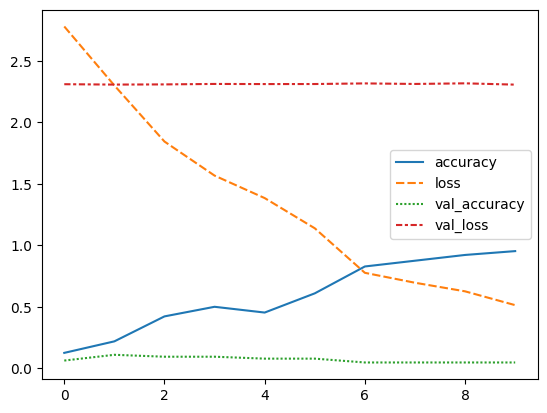

In [10]:
import seaborn as sns
sns.lineplot(model.history.history)

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0469 - loss: 2.3078
Loss:  2.307806968688965
Accuracy:  0.046875


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 


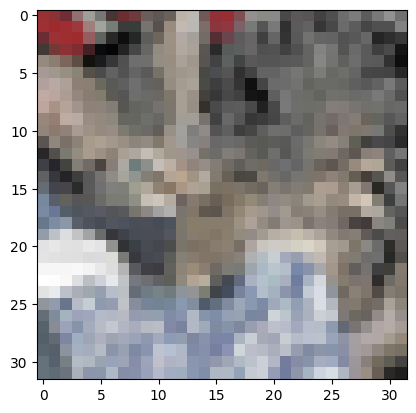

bird


In [12]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[30])
plt.show()
print(class_names[np.argmax(predicted_value[30], axis=0)])